## Sample Theory

Bütünden bir parça (sample) --> örneklem "Better,not more!"

## Central Limit Theorem

Bağımsız ve aynı dağılama sahip rassal değişkenlerin toplamı ya da aritmetik ortalaması yaklaşık olarak normal dağılmaktadır.

In [40]:
import numpy as np
population=np.random.randint(0,80,1000)
np.random.seed(10)
sample=np.random.choice(a=population,size=100)
sample[0:10]

array([76, 34, 52, 78, 13, 72, 57, 61, 57, 42])

In [10]:
print('mean of sample: '+((str)(sample.mean())))
print('mean of population: ' + ((str)(population.mean())))

mean of sample: 36.21
mean of population: 38.922


In [14]:
sample1=sample[0:10].mean()
sample2=sample[10:20].mean()
sample3=sample[20:30].mean()
sample4=sample[30:40].mean()
sample5=sample[40:50].mean()
sample6=sample[50:60].mean()
sample7=sample[60:70].mean()
sample8=sample[70:80].mean()
sample9=sample[80:90].mean()
sample10=sample[90:100].mean()
sumOfMeans=sample1+sample2+sample3+sample4+sample5+sample6+sample7+sample8+sample9+sample10
print(sumOfMeans/10)

36.209999999999994


## Kovaryans

iki değişken arasındaki ilişkinin değişkenlik ölçüsüdür.

cov(x,y)=E[(x-E[x])(y-E[y])]

## Korelasyon

iki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, şiddetini ve yönünü ifade eden istatiksel tekniktir.

In [17]:
import seaborn as sns
tips=sns.load_dataset('tips')
df=tips.copy()
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [18]:
!pip install researchpy
import researchpy as rp

rp.summary_cont(df[['total_bill','tip','size']])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [20]:
rp.summary_cat(df[['sex','smoker','day']])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [22]:
df[['tip','total_bill']].cov() #kovaryans

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [23]:
df[['tip','total_bill']].corr() #korolasyon

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## CONFIDENCE RANGE

Anakütle parametrisinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.

Bir web sitesinde geçirilen sürenin güven aralığı nedir ?
ortalama : 180 saniye , standart sapma: 40 saniye , n : 100
            
180 +- 1,96 * 40 / 100 ^1/2 ----> ortalama +- z sabiti * standart sapma / karekök n 

In [34]:
import math
minimum=180-1.96*40/math.sqrt(100)
maximum=180+1.96*40/math.sqrt(100)
print(((str)(minimum)) + ' -' + ((str)(maximum)))

172.16 -187.84


Fiyat Stratejisi Kararı Destek Sistemi

Problem: CEO fiyat için bir dayanak ve esneklik istiyor

alıcalara ürüne ne kadar öderdiniz diye soruluyor ve veriler toplanıyor.

In [36]:
fiyatlar=np.random.randint(10,110,100)
fiyatlar.mean()

import statsmodels.stats.api as sms

sms.DescrStatsW(fiyatlar).tconfint_mean()  # %95 güvenirlik ile 

(48.993450488810275, 59.96654951118972)

## OLASILIĞA GİRİŞ VE OLASILIK DAĞILIMLARI

Değerlerini bir deneyin sonucundan alan değişkene 'rassal değişken' denir.

*KESİKLİ OLASILIK DAĞILIMLARI
-->Bernoulli
-->Binom
-->Poisson

*SÜREKLİ OLASILIK DAĞILIMLARI
-->Normal Dağılım
-->Uniform Dağılım
-->Üstel Dağılım

### |Bernoulli Dağılımı

İki sonuçlu olaylar ile ilgilenildiğinde kullanılan kesikli olasılık dağılımıdır.

Başarılı-Başarısız // Olumlu - Olumsuz // 1 - 0

In [9]:
from scipy.stats import bernoulli
p=0.6
rv=bernoulli(p)
olmaOlasiligi=rv.pmf(k=1) #olma olasılığı
olmamaOlasiligi=rv.pmf(k=0) #olmama olasılığı
print("Olma Olasılığı :"+ (str)(olmaOlasiligi) + " Olmama Olasılığı: " +(str) (olmamaOlasiligi))

Olma Olasılığı :0.6 Olmama Olasılığı: 0.4


### |Büyük sayılar Yasası

Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.
Deney sayısı artıkça olasılık ortaya çıkar.

### Binom Dağılımı

Bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgenildiğinde kullanılan dağılımdır.

## İş Uygulaması : Reklam Harcaması Optimizasyonu 

Bir mecrada reklam verilecek.Dağılım ve reklama tıklama olasılığı biliniyor(0.01).

soru :Reklamı 100 kişi gördüğünde 1 , 5 ,10 tıklama olasılığı nedir ?

In [13]:
from scipy.stats import binom
p=0.01
n=100
rv=binom(n,p)
print("1 tıklama olasılığı : " + (str) (rv.pmf(1)))
print("5 tıklama olasılığı : " + (str) (rv.pmf(5)))
print("10 tıklama olasılığı : " + (str) (rv.pmf(10)))

1 tıklama olasılığı : 0.36972963764971983
5 tıklama olasılığı : 0.0028977871237616114
10 tıklama olasılığı : 7.006035693977161e-08


### Poison Dağılımı

Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamada kullanılır.

--> 10 bin kelimelik kitapta hatalı kelime sayısı
--> 4 bin öğrencilik okulda not girişinde hata yapılması

## İş uygulaması: İlan girişi hata olasılıklarının hesaplanması

-> 1 yıl ölçümler yapıldı -> Poison dağılımı biliniyor ve lambda 0,1 
-> hiç hata olmaması , 1 hata olması , 5 hata olması olasılığını hesaplayın

In [15]:
from scipy.stats import poisson
rv=poisson(mu=0.1)
print ("hiç hata olmaması olasılı : " + (str)(rv.pmf(k=0)))
print ("3 hata olması : " + (str)(rv.pmf(k=3)))
print ("5 hata olması : " + (str)(rv.pmf(k=5)))

hiç hata olmaması olasılı : 0.9048374180359595
3 hata olması : 0.00015080623633932676
5 hata olması : 7.54031181696634e-08


## Normal Dağılım 

Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplamaları için kullanılır.

### İş Uygulaması:

Bir toplantı öncesi, gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmesi isteniyor

Ortalama stış sayısı : 80 k , standart sapma: 5 k , 90k dan fazla satış yapma olasılığı ?

In [17]:
from scipy.stats import norm
1- norm.cdf(90,80,5) # istenen - ortalama - sapma 90 dan az olma olasılığı

0.02275013194817921

In [19]:
norm.cdf(90,80,5)- norm.cdf(85,80,5) # 85k - 90k arası olasılığı

0.13590512198327787

## Hipotez Testleri Nedir ?

Bir inanışı test etmek için kullanılan istatiksel bir tekniktir.

## Hata Tipleri

--> H0 yanlış ve H0 reddedilmedi : 2.tip hata

--> H0 doğru ve H0 reddedildi : 1.tip hata


## P-Value Değeri

p < 0.05 : H0 reddedilir.

## Hipotez Testi Adımları

---> Hipotezlerin Kurulması ve Yönlerinin belirlenmesi 
---> Anlamlılık düzeyinin ve tablo değerinin belirlenmesi
---> Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması
---> Hesaplanan test istatistiği ile alfa'ya denk gelen tablo değerinin karşılaştırılması.

Test istatistiği > TABLO DEĞERİ : H0 red edilir
    
--> Yorum yapılır 

## Tek Örneklem T testi

Popülasyon ortalaması ile varsayımsal bir değer arasında istatiksel olarak anlamlı bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testtir.

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


### Varasayımlar : -> Normal dağılım

### İş Uygulaması : Ürün satın alma adım optimizasyonu

Problem: Sepete ürün eklendiktn sonra ödeme ekranında 5 adım vardır ve bu adımların birisi sorgulanmaktadır.
    Detaylar: ->Her adımın 20 sn olma hedefi vardır. 4 .adım sorgulanıyor -> Bu durumu test etmek için 100 örnek alınır. -> örnek standar sapması 5 sn dir. -> ortalama 19 sn dir.
        

### İş Uygulaması : Web sitesinde geçirilen sürenin testi

Problem: Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

In [22]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [23]:
import scipy.stats as stats

stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## Varsayımlar 

### Normallik Varsayımı  - Histogram

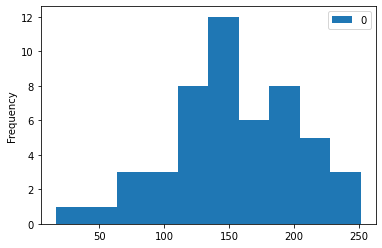

In [26]:
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

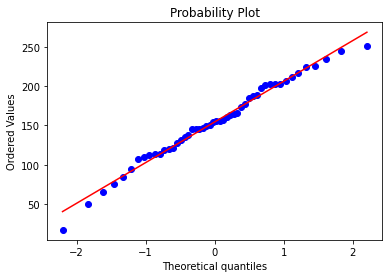

In [27]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

## Shapiro-Wilks Testi

H0: Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur

H1: ... fark vardır

In [30]:
from scipy.stats import shapiro
shapiro(olcumler)
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-value: " + str(shapiro(olcumler)[1])) # P value değeri 0.05 ten büyük red edilemez

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-value: 0.7848747968673706


## Hipotez Testinin Uygulanması

In [32]:
stats.ttest_1samp(olcumler, popmean = 170) # p value değer 0.05 ten küçük h0 red edillir.


Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)


## Nonparametrik Tek Örneklem T Testi

Eğer varsayımlar sağlanmasaydı nonparemetrik test yapılırdı.

In [33]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

## Tek Örneklem Oran Testi

Oransal bir ifade test edilmek istenildiğinde kullanılır.
Varsayımlar : n > 30 olmalı 

## İş uygulaması  : Dönüşüm Oranı Testi

Dönüşüm Oranı = reklam görüntülenmesi / reklam tıklanılması

Problem : 0.125 dönüşüm oranı elde edildiği ifade edilmiş fakat oran büyük ve gelirlerle örtüşmüyor.

    Detaylar: 500 kişi reklamları görmüş 40 kişi tıklamış dönüşüm oranı 40/ 500= 0.08

In [2]:
from statsmodels.stats.proportion import proportions_ztest
count=40
nobs=500
value=0.125
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

p < 0.05 olduğu için h0 red edildi. 

## Bağımsız İki Örneklem T Testi (AB Testi)

iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

Varsayımlar: Normallik , Varyans Homejenliği 

## İş Uygulaması: ML Modelinin Başarı Testi

Problem : Bir ML projesine yatırım yapılıyor. Eski gelir ve Yeni gelirler arasında anlamlı bir farklılık olup olmadığı test ediliyor.


In [7]:
#VERI TIPI I
import numpy as np
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [8]:
#VERI TIPI II
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


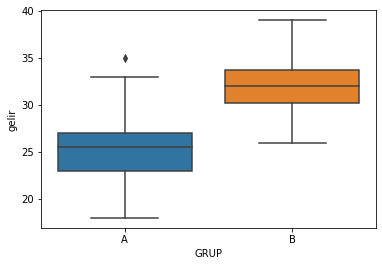

In [9]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Varsayım Kontrolü 
### normallik varsayımı

In [11]:
from scipy.stats import shapiro
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [12]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

In [17]:
#varyans homojenligi varsayımı
from scipy import stats
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [ ]:
## Hipotez Testi

In [18]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [19]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


## Nonparametrik Bağımsız İki Örneklem Testi

In [21]:
stats.mannwhitneyu(A_B["A"], A_B["B"])
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000


## Bağımlı İki Örneklem T Testi

Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

Varsayımlar : Normallik , Varyans Homojenliği 

## İş uygulaması : Şirket içi eğitimin performans etkisi ölçümü

In [23]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [25]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



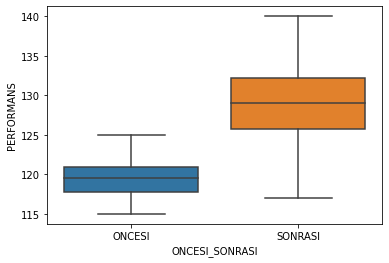

In [26]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

In [28]:
# Varsayım kontrolü 
from scipy.stats import shapiro
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

In [27]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

In [31]:
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [32]:
## Hipotez Testi

stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.5f, p-değeri = %.5f' % (test_istatistigi, pvalue))

Test İstatistiği = -9.28153, p-değeri = 0.00000


## Nonparametrik Bağımlı İki Örneklem Testi

In [33]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])

print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


## İki Örneklem Oran Testi

İki oran arasında karşılaştırma yapmak için kullanılır.

n> 30 olmalı


##İş Uygulaması: UI Deneyi (AB TESTİ)

Kırmızı buton mu / Yeşil Buton mu 
yeşil buton : 1000 görüntülenme , 300 tıklama
    
kırmızı buton: 1100 görüntülenme,250 tıklama

In [34]:
from statsmodels.stats.proportion import proportions_ztest

basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

## Varyans Analizi

İki ya da daha fazla grup ortalaması arasında istatiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenidiğinde kullanılır.

Varsayımlar : 
    -->Gözlemlerin birbirinden bağımsız olması 
    -->Normal dağılım 
    -->Varyans Homeojenliği
    
İş Uygulaması : Anasayfa İçerik Straetjisi Belirlenmesi
Anasayfada geçirilen süre artırılmak isteniyor. 
A : Olduğu Gibi B: Yönlendirici C:İlgi Çekici 

## Varsayım Kontrolü 

In [2]:
import pandas as pd
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [7]:
# Normallik shapiro testi

from scipy import stats 
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.969743549823761, pvalue=0.5321813225746155)

In [8]:
stats.shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [9]:
stats.shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [10]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [12]:
## Hipotez Testi
 
stats.f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])
print('{:.5f}'.format(stats.f_oneway(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


In [13]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [14]:
## Non paremetrik hipotez testi

stats.kruskal(ABC["GRUP_A"], ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

## Korelasyon Analizi

Değişkenler arasındaki ilişki bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatiksel bir yöntemdir.

Bahşiş veri seti:

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [16]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
df["total_bill"] = df["total_bill"] - df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,13.96,1.01,Female,No,Sun,Dinner,2
1,5.36,1.66,Male,No,Sun,Dinner,3
2,10.51,3.50,Male,No,Sun,Dinner,3
3,13.75,3.31,Male,No,Sun,Dinner,2
4,13.76,3.61,Female,No,Sun,Dinner,4


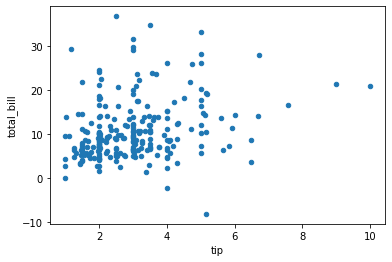

In [20]:
df.plot.scatter("tip","total_bill")

In [21]:
## Varsayım Kontrolü 

test_istatistigi, pvalue = stats.shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = stats.shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))


Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.8993, p-değeri = 0.0000


In [22]:
## Hipotez Testi

test_istatistigi, pvalue =stats.stats.pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.2733, p-değeri = 0.0000


In [23]:
## Non parametrik Hipotez Testi

test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.3051, p-değeri = 0.0000


In [24]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.2158, p-değeri = 0.0000
